In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from mapie.metrics import regression_coverage_score

In [2]:
regressor = LinearRegression()
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=59)

In [3]:
from mapie.regression import MapieRegressor
alpha = [0.05, 0.32]
mapie = MapieRegressor(regressor)
mapie.fit(X, y)
y_pred, y_pis = mapie.predict(X, alpha=alpha)

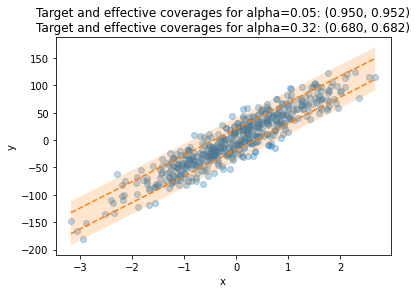

In [9]:
coverage_scores = [
    regression_coverage_score(y, y_pis[:, 0, i], y_pis[:, 1, i])
    for i, _ in enumerate(alpha)
]

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X, y, alpha=0.3)
#plt.plot(X, y_pred[:, 0, 0], color="C1")
order = np.argsort(X[:, 0])
plt.plot(X[order], y_pis[order][:, 0, 1], color="C1", ls="--")
plt.plot(X[order], y_pis[order][:, 1, 1], color="C1", ls="--")
plt.fill_between(
    X[order].ravel(),
    y_pis[order][:, 0, 0].ravel(),
    y_pis[order][:, 1, 0].ravel(),
    alpha=0.2
)
plt.title(
    f"Target and effective coverages for "
    f"alpha={alpha[0]:.2f}: ({1-alpha[0]:.3f}, {coverage_scores[0]:.3f})\n"
    f"Target and effective coverages for "
    f"alpha={alpha[1]:.2f}: ({1-alpha[1]:.3f}, {coverage_scores[1]:.3f})"
)
plt.show()